In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [23]:
merged_data = pd.read_csv('merged_data.csv')

In [24]:
merged_data.head()

,comments_count,id,score,upvoted,posted_at_timestamp,space_count,len_text,post_karma,comment_karma,date
0,3476,1,131695,95,1595176568,25,3049,12,239,2020-07-19 16:36:08
1,3952,2,116584,94,1594145740,59,5292,14,3,2020-07-07 18:15:40
2,1822,2,27574,98,1593924112,33,2402,14,3,2020-07-05 04:41:52
3,5678,3,116038,94,1593641875,28,3906,17,5,2020-07-01 22:17:55
4,10093,3,48414,94,1593465966,21,3291,17,5,2020-06-29 21:26:06


In [24]:
merged_data_x = merged_data.drop(['id', 'score', 'date'], axis=1)
merged_data_y = merged_data.score

In [1]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged_data_x, merged_data_y, test_size = 0.30, random_state = 42)

In [2]:
clf_rf = RandomForestRegressor()

In [4]:
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
%matplotlib inline

In [5]:
parametrs = {'n_estimators':  [ 40], 'max_depth': [12]}

In [6]:
grid_clf_rf = GridSearchCV(clf_rf, param_grid=parametrs, cv=5)

In [82]:
grid_clf_rf.fit(X_train, y_train)

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [12], 'n_estimators': [40]})

In [83]:
grid_clf_rf.best_params_

{'max_depth': 12, 'n_estimators': 40}

In [84]:
best_grid_clf_rf = grid_clf_rf.best_estimator_

In [85]:
best_grid_clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=40)

In [86]:
feature_importances = best_grid_clf_rf.feature_importances_

In [87]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                      'feature_importances': feature_importances})

<AxesSubplot:>

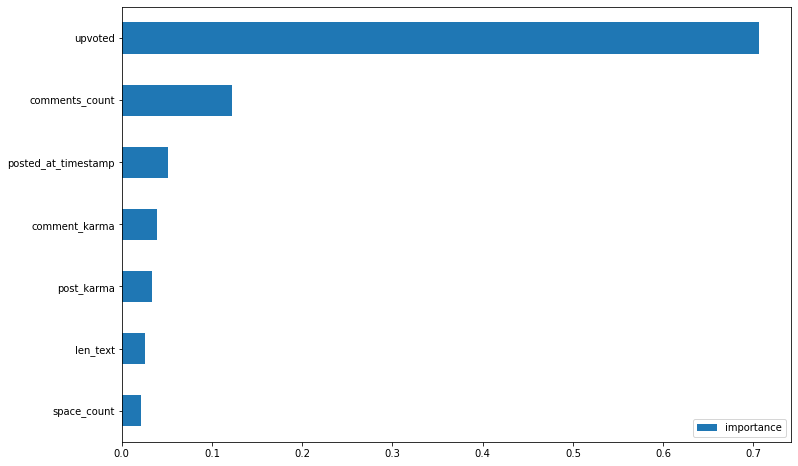

In [88]:
imp = pd.DataFrame(best_grid_clf_rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [89]:
best_grid_clf_rf.score(X_train, y_train)

0.4310400386691372

In [37]:
y_pred = best_grid_clf_rf.predict(X_test)

In [90]:
best_grid_clf_rf.score(X_test, y_test)

0.3429511278195489

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged_data_x, merged_data_y, test_size = 0.20, random_state = 42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [32]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

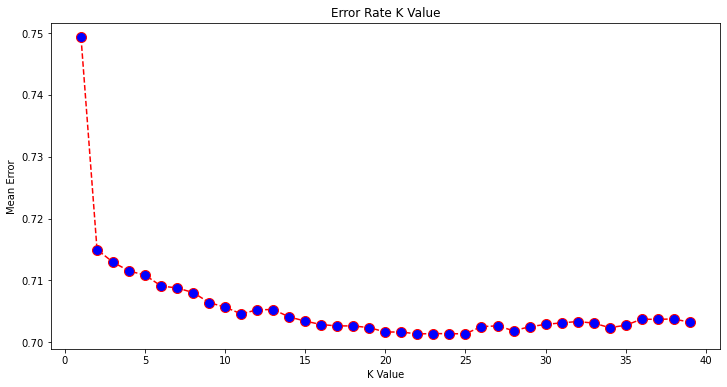

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Рекомендации
* Добавление новых признаков из текста постов с помощью инструментов NLP
* Проверка гипотезы, что наличие определенных слов или отношение поста к какой-либо тематике влияет на рейтинг
* Использование других алгоритмов

<AxesSubplot:xlabel='date', ylabel='Density'>

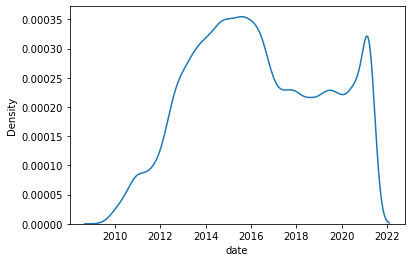

In [29]:
sns.kdeplot(data=merged_data, x='date')

<AxesSubplot:xlabel='post_karma', ylabel='Density'>

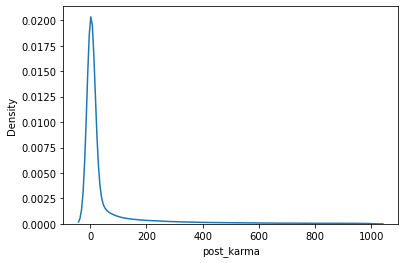

In [53]:
sns.kdeplot(data=merged_data, x='post_karma')

<AxesSubplot:xlabel='comment_karma', ylabel='Density'>

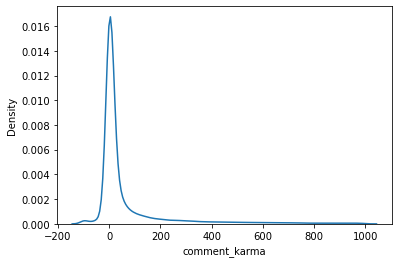

In [52]:
sns.kdeplot(data=merged_data, x='comment_karma')

<AxesSubplot:xlabel='upvoted', ylabel='score'>

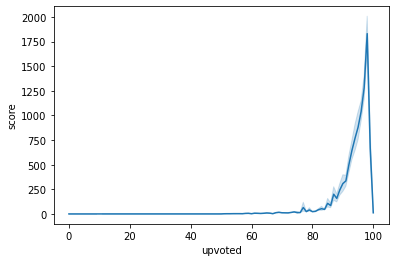

In [48]:
sns.lineplot(x=merged_data.upvoted, y=merged_data.score)

<AxesSubplot:xlabel='post_karma', ylabel='score'>

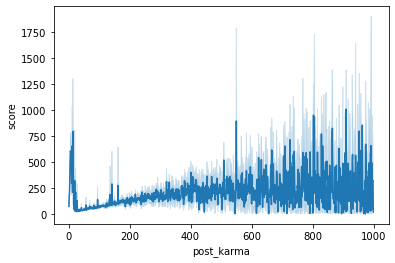

In [49]:
sns.lineplot(x=merged_data.post_karma, y=merged_data.score)

<AxesSubplot:xlabel='comment_karma', ylabel='comments_count'>

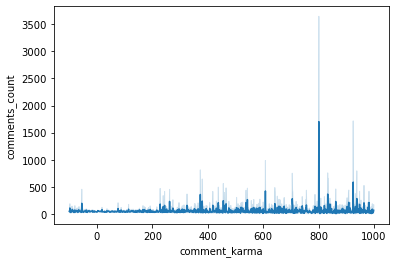

In [51]:
sns.lineplot(x=merged_data.comment_karma, y=posts.comments_count)

<AxesSubplot:xlabel='comments_count', ylabel='score'>

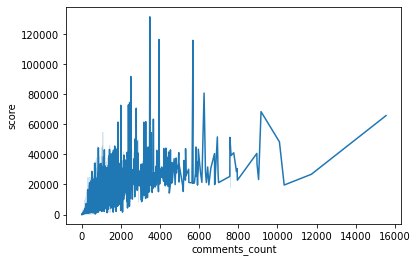

In [39]:
sns.lineplot(x=posts.comments_count, y=posts.score)

<AxesSubplot:xlabel='comments_count', ylabel='Density'>

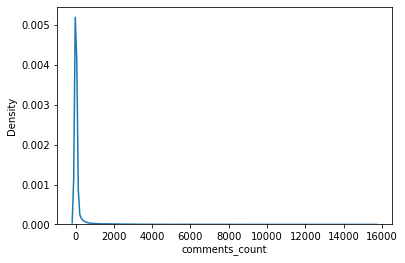

In [34]:
sns.kdeplot(data=posts_data, x='comments_count')

<AxesSubplot:xlabel='score', ylabel='Density'>

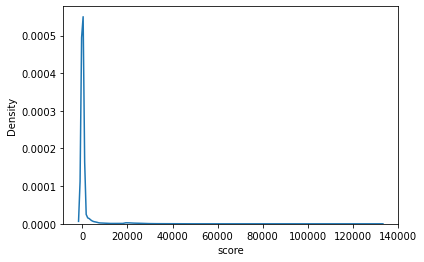

In [35]:
sns.kdeplot(data=posts_data, x='score')

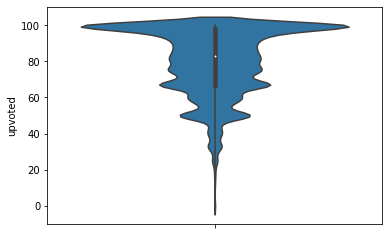

In [36]:
ax = sns.violinplot(y=posts_data['upvoted'])

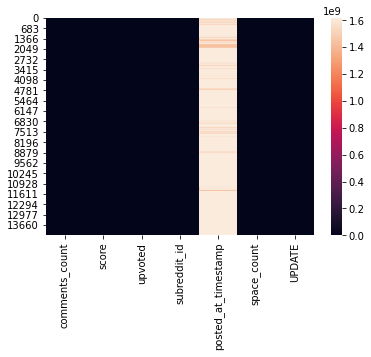

In [21]:
g = sns.heatmap(posts_data)